## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

metadata_result_complete = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview

metadata_result_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

mice = metadata_result_complete["Mouse ID"].value_counts()
mice_number = len(mice)
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicate = metadata_result_complete.loc[metadata_result_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_id = pd.DataFrame(mice_duplicate)

duplicate_mouse_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = metadata_result_complete[metadata_result_complete['Mouse ID'].isin(mice_duplicate)==False]

cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice = cleaned_df["Mouse ID"].value_counts()
cleaned_mouse = len(clean_mice)
cleaned_mouse

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Calculating the mean

mean_regimen = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
mean_regimen

# Calculating the median

median_regimen = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
median_regimen

# Calculating the variance

variance_regimen = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
variance_regimen

# Calculating the standard deviation

std_regimen = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
std_regimen

# Calculating the SEM

sem_regimen = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
sem_regimen

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Creating a new dataframe for summary statistics table

summary_statistics_df = pd.DataFrame({
    "Mean": mean_regimen,
    "Median": median_regimen,
    "Variance": variance_regimen,
    "Standard Deviation": std_regimen,
    "SEM": sem_regimen
    
})

summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Using the groupby function to calculate in a single function the mean, median, variance, standard deviation and SEM

summary_statistics_groupby = cleaned_df.groupby('Drug Regimen')

summary_statistics_df2 = summary_statistics_groupby.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

summary_statistics_df2.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

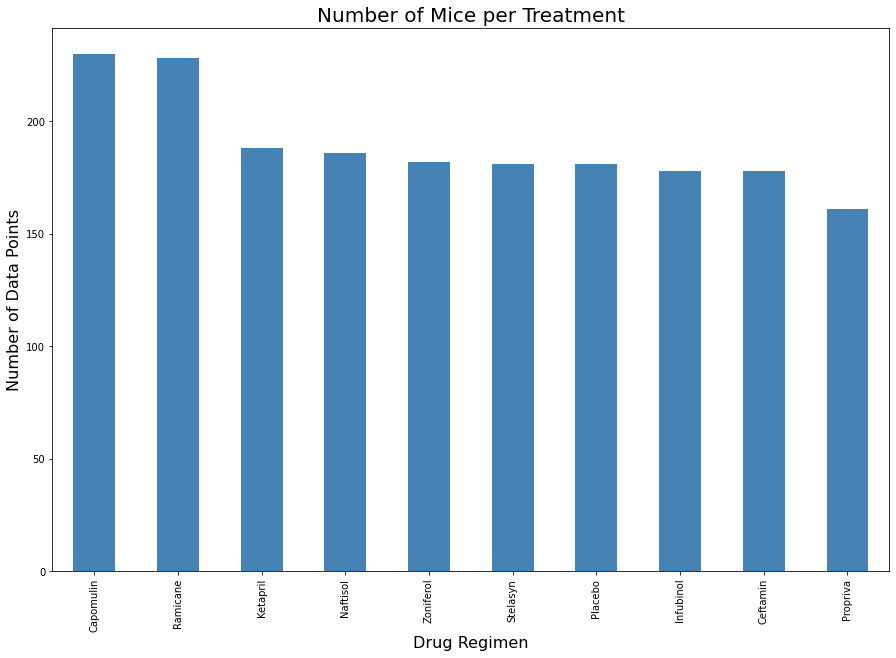

In [10]:
# Grouping data for plotting:

drug_regimen = metadata_result_complete["Drug Regimen"].value_counts()
mice_per_reg = metadata_result_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Pandas bar plot:

mice_per_reg.sort_values(ascending=False).plot(kind="bar",
                  color='steelblue', 
                  x='Drug Regimen', 
                  figsize=(15,10)) 

plt.title("Number of Mice per Treatment", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Number of Data Points", fontsize=16)


plt.savefig("../Images/pandas_bar_plot.png")
plt.show()

In [11]:
# Grouping data for plotting:

metadata_result_complete.groupby(["Drug Regimen"]).count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [12]:
# Sorting and formating data for plotting 

mice_number = (metadata_result_complete.groupby(["Drug Regimen"]).count()).sort_values("Mouse ID", ascending=False)["Mouse ID"]
x_axis = mice_number.index

In [13]:
# Sorted summary statistics

summary_statistics_df_sorted = summary_statistics_df.sort_values("Drug Regimen", ascending=False)

regimen_list = summary_statistics_df_sorted.index.tolist()

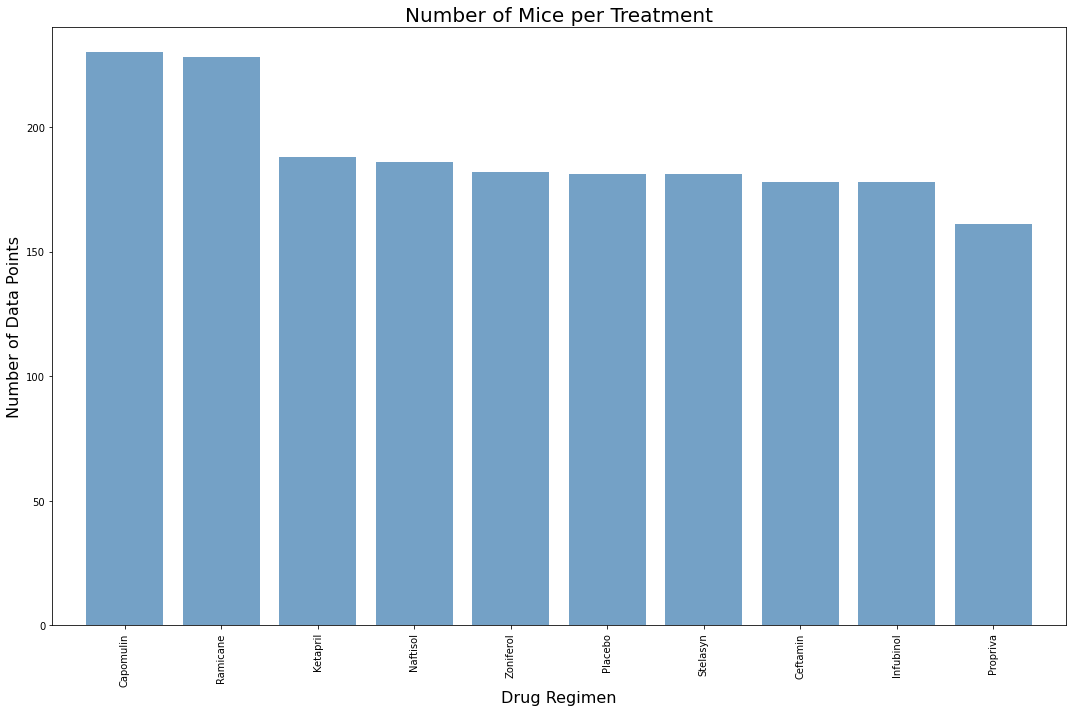

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Defining the axis

x_ticks = np.arange(len(mice_number.index))
tick_locations = [value for value in x_ticks]

# Using the plt. bar passing in our x-axis

plt.figure(figsize=(15,10))
plt.bar(x_ticks , mice_number, color="steelblue", alpha=0.75, align="center")
plt.xticks(tick_locations,x_axis, rotation=90)

plt.title("Number of Mice per Treatment", fontsize=20)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Number of Data Points", fontsize=16)

plt.xlim(-0.75, len(regimen_list)-.25)
plt.ylim(0, max(mice_number)+10)

plt.tight_layout()

plt.savefig("../Images/pyplot_bar_plot.png")
plt.show()

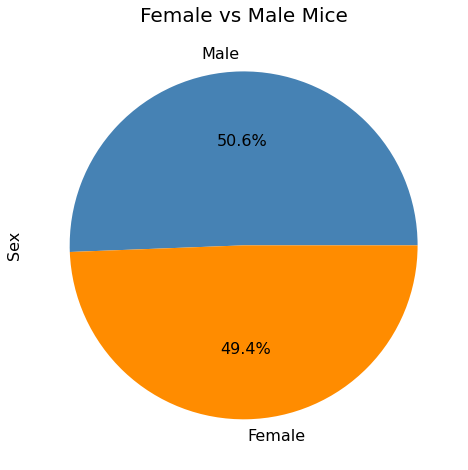

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Pandas pie plot: 

metadata_result_complete['Sex'].value_counts().plot(kind='pie', 
                                                    colors = ["steelblue", "darkorange"],
                                                    autopct='%1.1f%%',
                                                    figsize=(12,8),
                                                    title="Female vs Male Mise",fontsize=16)
plt.title("Female vs Male Mice", fontsize=20)
plt.ylabel('Sex',fontsize=16)
plt.savefig("../Images/pie_plot_pandas.png")

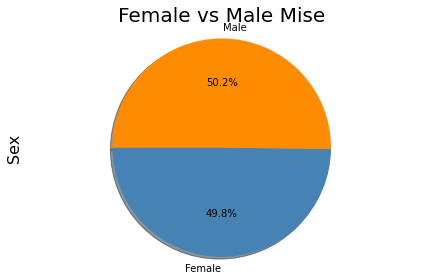

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ["Female", "Male"]
percentage_of_sex = [49.80, 50.20]
colors = ["steelblue", "darkorange"]
explode = (0.1, 0)

plt.title("Female vs Male Mise", fontsize=20)
plt.ylabel("Sex", fontsize=16)
plt.pie(percentage_of_sex, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")

plt.tight_layout()

plt.savefig("../Images/pie_plot_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Starting with Capomulin treatment regimens:

capomulin_reg_df = metadata_result_complete.loc[metadata_result_complete["Drug Regimen"] == "Capomulin",:]
capomulin_reg_df.head()

capomulin_treat = capomulin_reg_df.groupby('Mouse ID').max()['Timepoint']
capomulin_df = pd.DataFrame(capomulin_treat)

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint    

capomulin_merge = pd.merge(capomulin_df,metadata_result_complete, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Capomulin tumor volume at the last timepoint
capomulin_tumor_vol = capomulin_merge["Tumor Volume (mm3)"]
capomulin_tumor_vol.head()

0    38.982878
1    38.939633
2    30.485985
3    37.074024
4    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Calculating Capomulin's IQR and determining outliers using upper and lower bounds

quartiles = capomulin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Capomulin outliers using upper and lower bounds

outlier_capomulin = capomulin_tumor_vol.loc[(capomulin_tumor_vol < lower_bound) | (capomulin_tumor_vol > upper_bound)]
outlier_capomulin

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [20]:
# Ramicane treatment regimens:

ramicane_reg_df = metadata_result_complete.loc[metadata_result_complete["Drug Regimen"] == "Ramicane", :]
ramicane_reg_df

ramicane_treat = ramicane_reg_df.groupby('Mouse ID').max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_treat)

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint    

ramicane_merge = pd.merge(ramicane_df,metadata_result_complete, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [21]:
# Ramicane tumor volume at the last timepoint 
ramicane_tumor_vol = ramicane_merge["Tumor Volume (mm3)"]
ramicane_tumor_vol.head()

0    38.407618
1    43.047543
2    38.810366
3    32.978522
4    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [22]:
# Calculating Ramicane's IQR and determining outliers using upper and lower bounds

quartiles = ramicane_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Ramicane outliers using upper and lower bounds 

outlier_ramicane = ramicane_tumor_vol.loc[(ramicane_tumor_vol < lower_bound) | (ramicane_tumor_vol > upper_bound)]
outlier_ramicane

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [23]:
# Infubinol treatment regimens:

infubinol_reg_df = metadata_result_complete.loc[metadata_result_complete["Drug Regimen"] == "Infubinol", :]
infubinol_reg_df.head()

infubinol_treat = infubinol_reg_df.groupby('Mouse ID').max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_treat)

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint  

infubinol_merge = pd.merge(infubinol_df,metadata_result_complete, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [24]:
# Infubinol tumor volume at the last timepoint
infubinol_tumor_vol = infubinol_merge["Tumor Volume (mm3)"]
infubinol_tumor_vol.head()

0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [25]:
# Calculating Infubional's IQR and determining outliers using upper and lower bounds

quartiles = infubinol_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Infubional outliers using upper and lower bounds

outlier_infubinol = infubinol_tumor_vol.loc[(infubinol_tumor_vol < lower_bound) | (infubinol_tumor_vol > upper_bound)]
outlier_infubinol

# After quantitative assessment, it was determined that there was one outlier for Infubinol. 

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


5    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [26]:
# Infubinol treatment regimens:

ceftamin_reg_df = metadata_result_complete.loc[metadata_result_complete["Drug Regimen"] == "Ceftamin", :]
ceftamin_reg_df.head()

ceftamin_treat = ceftamin_reg_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_treat)

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint

ceftamin_merge = pd.merge(ceftamin_df,metadata_result_complete, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [27]:
# Ceftamin tumor volume at the last timepoint
ceftamin_tumor_vol = ceftamin_merge["Tumor Volume (mm3)"]
ceftamin_tumor_vol.head()

0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [28]:
# Calculating Ceftamin's IQR and determining outliers using upper and lower bounds

quartiles = ceftamin_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Ceftamin outliers using upper and lower bounds

outlier_ceftamin = ceftamin_tumor_vol.loc[(ceftamin_tumor_vol < lower_bound) | (ceftamin_tumor_vol > upper_bound)]
outlier_ceftamin

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

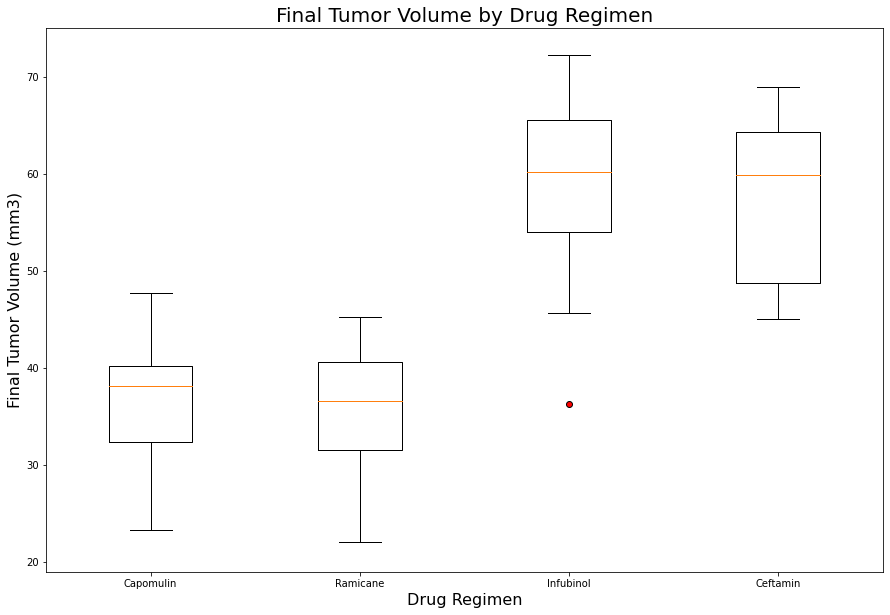

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [capomulin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]

Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

red_circle = dict(markerfacecolor='r', marker='o')

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumor Volume by Drug Regimen', fontsize=20)
ax1.set_ylabel('Final Tumor Volume (mm3)', fontsize=16)
ax1.set_xlabel('Drug Regimen', fontsize=16)
ax1.boxplot(plot_data, labels=Regimen, widths=0.4, vert=True, flierprops=red_circle)

plt.ylim(19, 75)

plt.savefig("../Images/final_tumor_reg_box.png")

plt.show()

## Line and Scatter Plots

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

tp_tv_df = capomulin_reg_df.loc[capomulin_reg_df["Mouse ID"] == "l509",:]
tp_tv_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


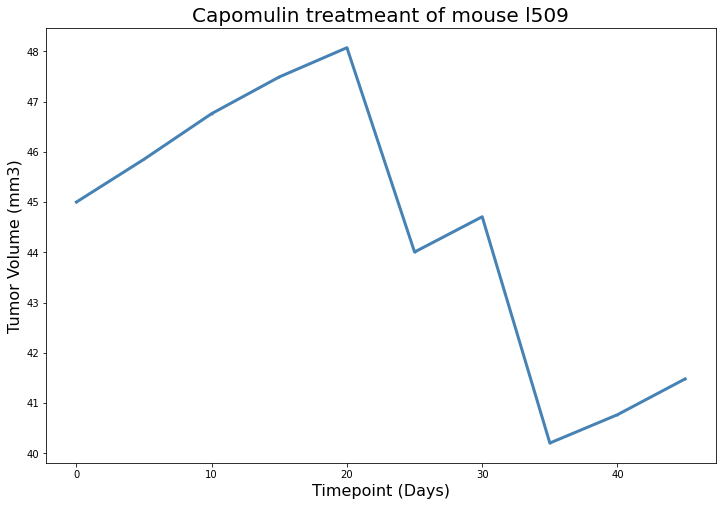

In [31]:
# Mouse l509 line plot

x_axis = tp_tv_df["Timepoint"]
tumor_vol = tp_tv_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))

plt.plot(x_axis, tumor_vol,marker="o",color="steelblue", label="Fahreneit", linewidth=3, markersize=1)

plt.title('Capomulin treatmeant of mouse l509', fontsize=20)
plt.xlabel('Timepoint (Days)', fontsize=16)
plt.ylabel('Tumor Volume (mm3)', fontsize=16)


plt.savefig("../Images/capomulin_l509_line.png")
plt.show()

In [32]:
avg_capomulin_tumor_vol =capomulin_reg_df.groupby(['Mouse ID']).mean()
avg_capomulin_tumor_vol.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


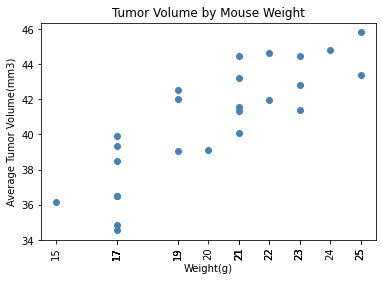

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight = avg_capomulin_tumor_vol.iloc[:,1]
average_tumor_volume = avg_capomulin_tumor_vol.iloc[:,3]

plt.scatter(mouse_weight,average_tumor_volume,color="steelblue")

plt.xticks(mouse_weight, rotation=90)
plt.title('Tumor Volume by Mouse Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.savefig("../Images/tumor_weight_scatter.png")
plt.show() 

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corrolation_coefficient = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(corrolation_coefficient[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


In [35]:
x_values = avg_capomulin_tumor_vol['Weight (g)']
y_values = avg_capomulin_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

In [36]:
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corrolation_coefficient}")
print(f"stderr:{stderr}")

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):(0.8419363424694717, 1.322572243471279e-07)
stderr:0.1275435903320134


The r-squared is: 0.7088568047708717


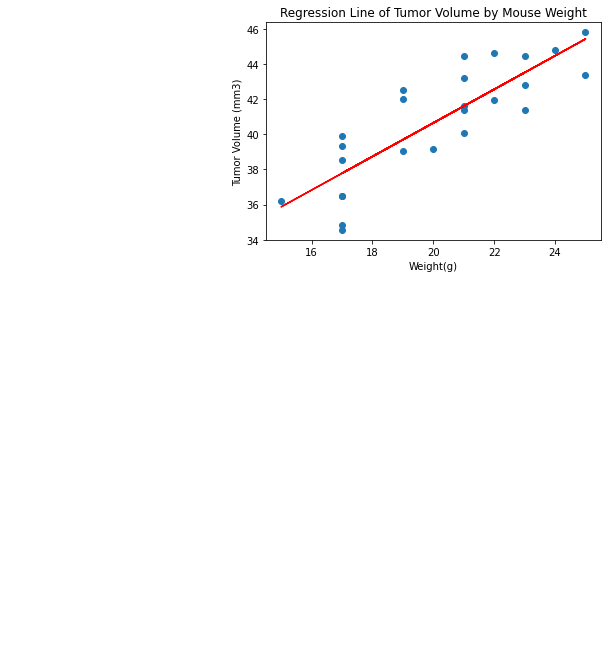

In [37]:
# Add the linear regression equation and line to plot

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.title('Regression Line of Tumor Volume by Mouse Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")


plt.savefig("../Images/linear_regression.png")

plt.show()